/tmp/ipykernel_56776/263527553.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gld_data = yf.download(ticker_symbol, start=start_date, end=end_date)[['Close']]
[*********************100%***********************]  1 of 1 completed


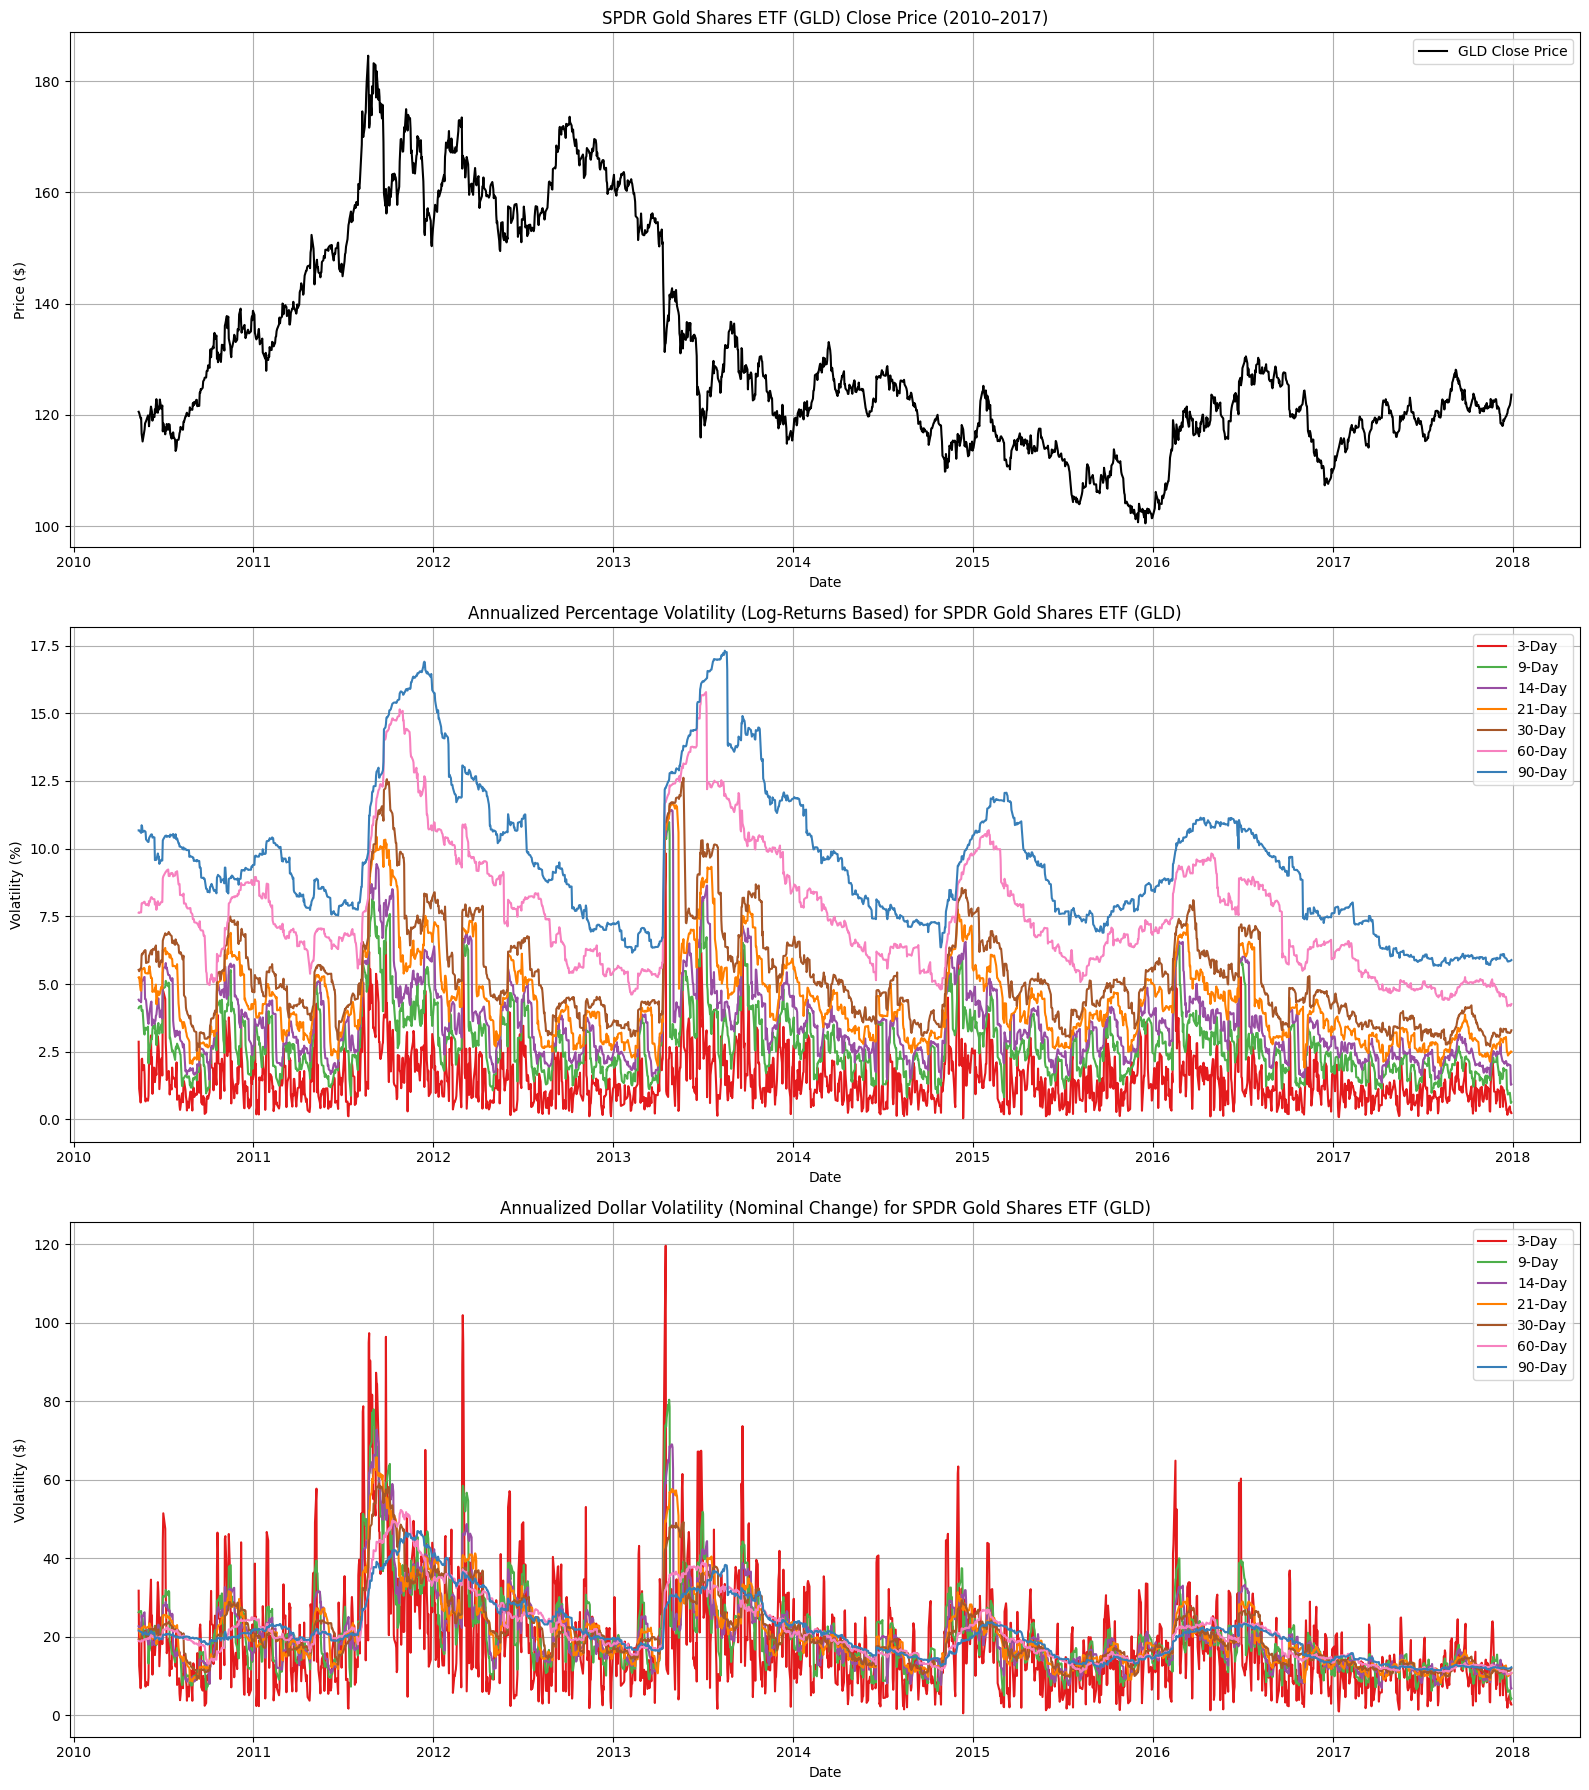

Data exported to gld_volatility_data2010_2017.csv


In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ticker_symbol = 'GLD'
start_date = '2010-01-01'
end_date = '2017-12-31'
vol_windows = [3, 9, 14, 21, 30, 60, 90]

gld_data = yf.download(ticker_symbol, start=start_date, end=end_date)[['Close']]
gld_data.reset_index(inplace=True)
gld_data.columns = ['Date', 'Close']

gld_data['Log_Returns'] = np.log(gld_data['Close'] / gld_data['Close'].shift(1))

for window in vol_windows:
    rolling_std = gld_data['Log_Returns'].rolling(window=window).std()
    annualized_std = rolling_std * np.sqrt(252)

    gld_data[f'{window}_Day_Volatility'] = annualized_std * gld_data['Close']

    gld_data[f'{window}_Day_Percent_Volatility'] = annualized_std * 100 * np.sqrt(window / 252)

gld_data.dropna(inplace=True)
line_colors = [
    '#e41a1c',
    '#4daf4a',
    '#984ea3',
    '#ff7f00',
    '#a65628',
    '#f781bf',
    '#377eb8'
]


plt.figure(figsize=(16, 18))
colors = plt.cm.viridis(np.linspace(0, 1, len(vol_windows)))

plt.subplot(3, 1, 1)
plt.plot(gld_data['Date'], gld_data['Close'], color='black', label='GLD Close Price')
plt.title('SPDR Gold Shares ETF (GLD) Close Price (2010–2017)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid()
plt.legend()

plt.subplot(3, 1, 2)
for i, window in enumerate(vol_windows):
    col = f'{window}_Day_Percent_Volatility'
    plt.plot(gld_data['Date'], gld_data[col], label=f'{window}-Day', color=line_colors[i % len(line_colors)])
plt.title('Annualized Percentage Volatility (Log-Returns Based) for SPDR Gold Shares ETF (GLD)')
plt.xlabel('Date')
plt.ylabel('Volatility (%)')
plt.grid()
plt.legend()
plt.subplot(3, 1, 3)
for i, window in enumerate(vol_windows):
    col = f'{window}_Day_Volatility'
    plt.plot(gld_data['Date'], gld_data[col], label=f'{window}-Day', color=line_colors[i % len(line_colors)])
plt.title('Annualized Dollar Volatility (Nominal Change) for SPDR Gold Shares ETF (GLD)')
plt.xlabel('Date')
plt.ylabel('Volatility ($)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.savefig('gld_volatility_plots.pdf')
plt.show()


export_cols = ['Date', 'Close']
export_cols += [f'{w}_Day_Volatility' for w in vol_windows]
export_cols += [f'{w}_Day_Percent_Volatility' for w in vol_windows]

gld_data[export_cols].to_csv('gld_volatility_data2010_2017.csv', index=False)
print("Data exported to gld_volatility_data2010_2017.csv")